<a href="https://colab.research.google.com/github/Shivamani162/AIML/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = '/content/drive/MyDrive/CarEval.csv'
df = pd.read_csv(data, header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6
0,buying,maint,doors,persons,lug_boot,safety,class values
1,vhigh,vhigh,2,2,small,low,unacc
2,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,small,high,unacc
4,vhigh,vhigh,2,2,med,low,unacc


In [6]:
df.shape

(1729, 7)

In [7]:
col_names =['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,buying,maint,doors,persons,lug_boot,safety,class values
1,vhigh,vhigh,2,2,small,low,unacc
2,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,small,high,unacc
4,vhigh,vhigh,2,2,med,low,unacc


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1729 non-null   object
 1   maint     1729 non-null   object
 2   doors     1729 non-null   object
 3   persons   1729 non-null   object
 4   lug_boot  1729 non-null   object
 5   safety    1729 non-null   object
 6   class     1729 non-null   object
dtypes: object(7)
memory usage: 94.7+ KB


In [10]:
df.value_counts().sum()

1729

In [11]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df[col].value_counts())

buying
vhigh     432
high      432
med       432
low       432
buying      1
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
maint      1
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
doors      1
Name: count, dtype: int64
persons
2          576
4          576
more       576
persons      1
Name: count, dtype: int64
lug_boot
small       576
med         576
big         576
lug_boot      1
Name: count, dtype: int64
safety
low       576
med       576
high      576
safety      1
Name: count, dtype: int64
class
unacc           1210
acc              384
good              69
vgood             65
class values       1
Name: count, dtype: int64


In [12]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65
class values,1


In [13]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [15]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [16]:

X = df.drop(['class'], axis=1)

y = df['class']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)

(1158, 6)
(571, 6)


In [19]:
# Check the data type of X_train
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,small,high
468,high,vhigh,3,2,big,high
155,vhigh,high,3,more,small,med
1722,low,low,5more,more,small,high
1208,med,low,2,more,small,med


In [21]:
!pip install category_encoders
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


In [22]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [23]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,1,2
1722,3,3,2,1,1,1
1208,4,3,3,1,1,2


In [24]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,2,3,2
1201,4,3,3,3,3,3
628,2,2,2,2,2,3
1711,3,3,2,3,1,3
1263,4,3,4,1,1,1


In [25]:
from sklearn.tree import DecisionTreeClassifier


In [26]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [28]:
DecisionTreeClassifier(max_depth=3, random_state=0)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [29]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini[0:5]

array(['unacc', 'unacc', 'unacc', 'unacc', 'acc'], dtype=object)

In [30]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8039


In [31]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

In [32]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7755


In [33]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7755
Test set score: 0.8039


[Text(0.5909090909090909, 0.875, 'x[5] <= 2.5\ngini = 0.451\nsamples = 1158\nvalue = [251, 1, 48, 818, 40]'),
 Text(0.36363636363636365, 0.625, 'x[3] <= 1.5\ngini = 0.572\nsamples = 776\nvalue = [251, 0, 48, 437, 40]'),
 Text(0.4772727272727273, 0.75, 'True  '),
 Text(0.18181818181818182, 0.375, 'x[0] <= 2.5\ngini = 0.63\nsamples = 255\nvalue = [124, 0, 21, 88, 22]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.497\nsamples = 125\nvalue = [58, 0, 0, 67, 0]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.661\nsamples = 130\nvalue = [66, 0, 21, 21, 22]'),
 Text(0.5454545454545454, 0.375, 'x[3] <= 2.5\ngini = 0.488\nsamples = 521\nvalue = [127, 0, 27, 349, 18]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.0\nsamples = 256\nvalue = [0, 0, 0, 256, 0]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.632\nsamples = 265\nvalue = [127, 0, 27, 93, 18]'),
 Text(0.8181818181818182, 0.625, 'x[4] <= 3.5\ngini = 0.005\nsamples = 382\nvalue = [0, 1, 0, 381, 0]'),
 Text(0.7045454545454546, 0.75, '  False')

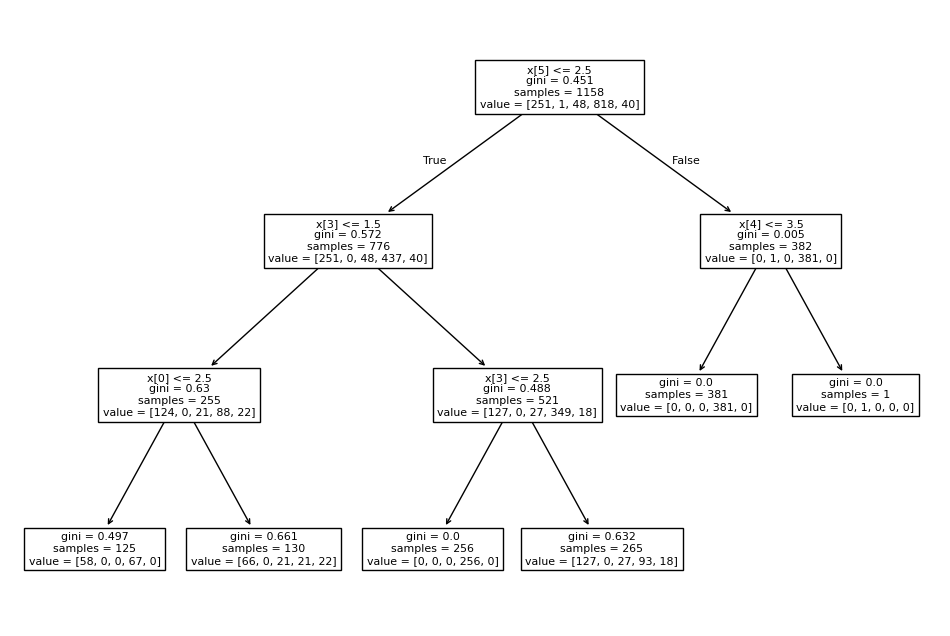

In [34]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

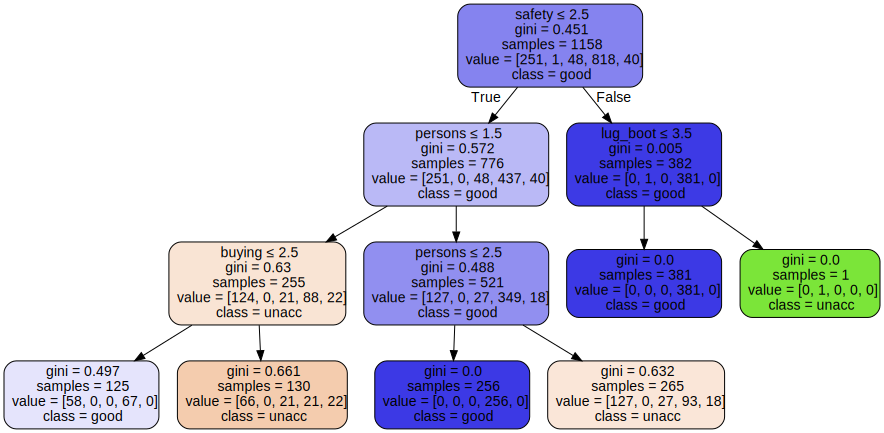

In [35]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [36]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [37]:
y_pred_en = clf_en.predict(X_test)
y_pred_en[0:5]

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc'], dtype=object)

In [38]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion gini index: 0.6865


In [39]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en[0:5]

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc'], dtype=object)

In [40]:
from sklearn.metrics import accuracy_score

print('Training-Set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-Set accuracy score: 0.7073


In [41]:
# Print the score accuracy for both train and test set.
print('Training-Set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Training-Set accuracy score: 0.7073
Model accuracy score with criterion gini index: 0.6865


[Text(0.5909090909090909, 0.875, 'x[5] <= 2.5\nentropy = 1.199\nsamples = 1158\nvalue = [251, 1, 48, 818, 40]'),
 Text(0.36363636363636365, 0.625, 'x[0] <= 2.5\nentropy = 1.462\nsamples = 776\nvalue = [251, 0, 48, 437, 40]'),
 Text(0.4772727272727273, 0.75, 'True  '),
 Text(0.18181818181818182, 0.375, 'x[1] <= 1.5\nentropy = 0.887\nsamples = 387\nvalue = [118, 0, 0, 269, 0]'),
 Text(0.09090909090909091, 0.125, 'entropy = 0.0\nsamples = 101\nvalue = [0, 0, 0, 101, 0]'),
 Text(0.2727272727272727, 0.125, 'entropy = 0.978\nsamples = 286\nvalue = [118, 0, 0, 168, 0]'),
 Text(0.5454545454545454, 0.375, 'x[1] <= 2.5\nentropy = 1.762\nsamples = 389\nvalue = [133, 0, 48, 168, 40]'),
 Text(0.45454545454545453, 0.125, 'entropy = 1.235\nsamples = 201\nvalue = [94, 0, 0, 97, 10]'),
 Text(0.6363636363636364, 0.125, 'entropy = 1.927\nsamples = 188\nvalue = [39.0, 0.0, 48.0, 71.0, 30.0]'),
 Text(0.8181818181818182, 0.625, 'x[1] <= 4.5\nentropy = 0.026\nsamples = 382\nvalue = [0, 1, 0, 381, 0]'),
 Text

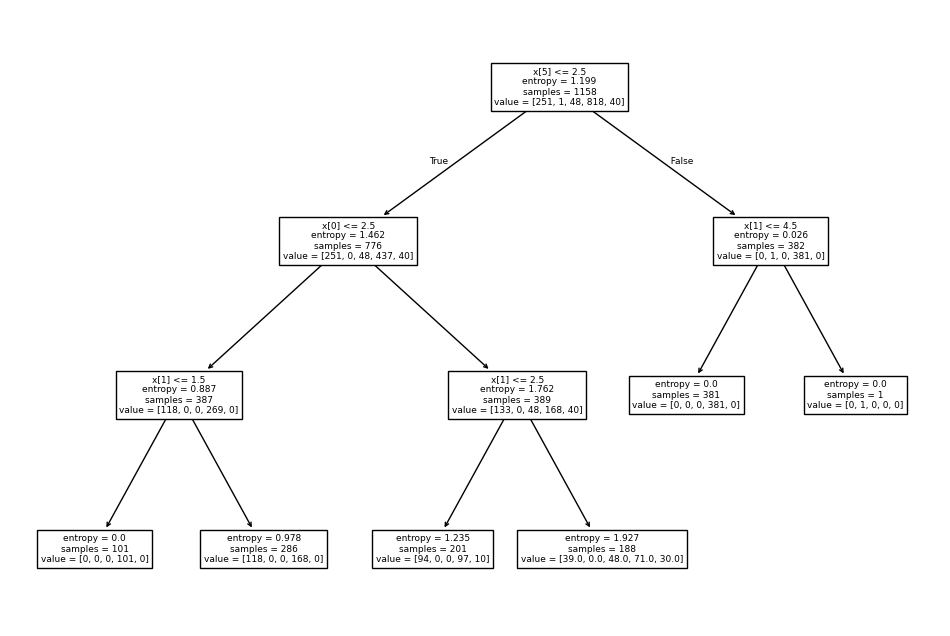

In [42]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

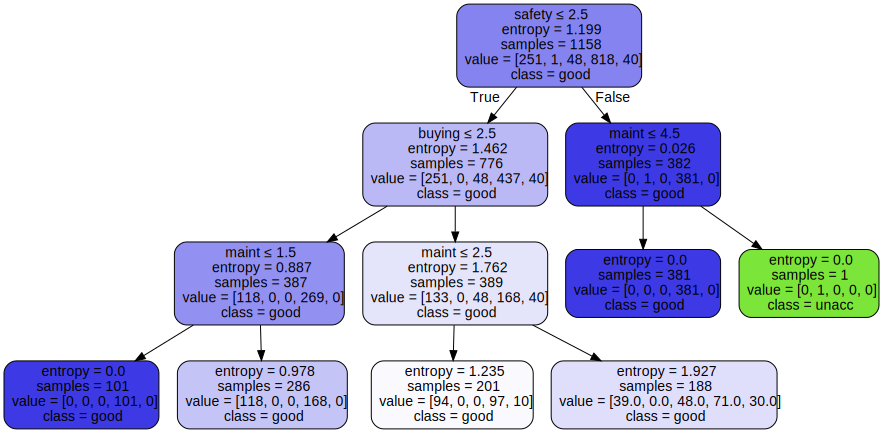

In [43]:
#Visualize decision-trees with graphviz
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph


In [44]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0   0 133   0]
 [  0   0  21   0]
 [  0   0 392   0]
 [  0   0  25   0]]


In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.00      0.00      0.00       133
        good       0.00      0.00      0.00        21
       unacc       0.69      1.00      0.81       392
       vgood       0.00      0.00      0.00        25

    accuracy                           0.69       571
   macro avg       0.17      0.25      0.20       571
weighted avg       0.47      0.69      0.56       571

